In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import torch

from dataset import DataTransform

%matplotlib inline

In [2]:
from model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

# SSD300
ssd_cfg = {
    'num_classes': 21, 
    'input_size': 300, 
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  
    'feature_maps': [38, 19, 10, 5, 3, 1], 
    'steps': [8, 16, 32, 64, 100, 300], 
    'min_sizes': [30, 60, 111, 162, 213, 264], 
    'max_sizes': [60, 111, 162, 213, 264, 315],
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

# SSD
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model = SSD(phase="inference", cfg=ssd_cfg)#.to(device)

# SSD
# model_weights = torch.load('./weights/weights51.pth')

model_weights = torch.load('./weights/ssd300_mAP_77.43_v2.pth', map_location={'cuda:0': 'cpu'})

model.load_state_dict(model_weights)

<All keys matched successfully>

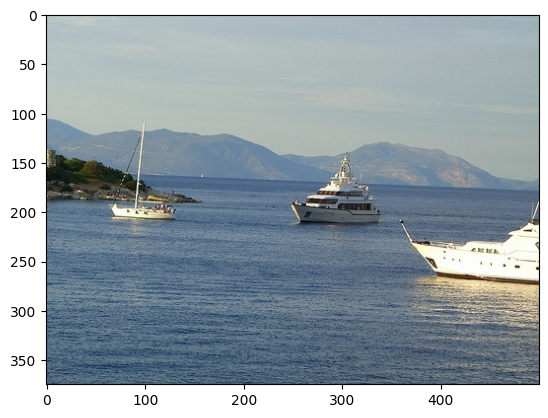

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0298, 0.1532, 0.3488, 0.3172, 0.5307],
          [0.0231, 0.0009, 0.3751, 0.1843, 0.5039],
          [0.0115, 0.5182, 0.3702, 0.6741, 0.5495],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         ...,

torch.Size([21, 200, 5])

In [3]:


image_file_path = "./voc_data/JPEGImages/2007_000241.jpg"
img = cv2.imread(image_file_path)

height, width, channels = img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

phase = "val"
img_transformed, boxes, labels = transform(img, phase, "", "") 
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

model.eval() 
x = img.unsqueeze(0)
x.size()
detections = model(x)

# print(detections.shape)
print(detections)
detections[0].shape

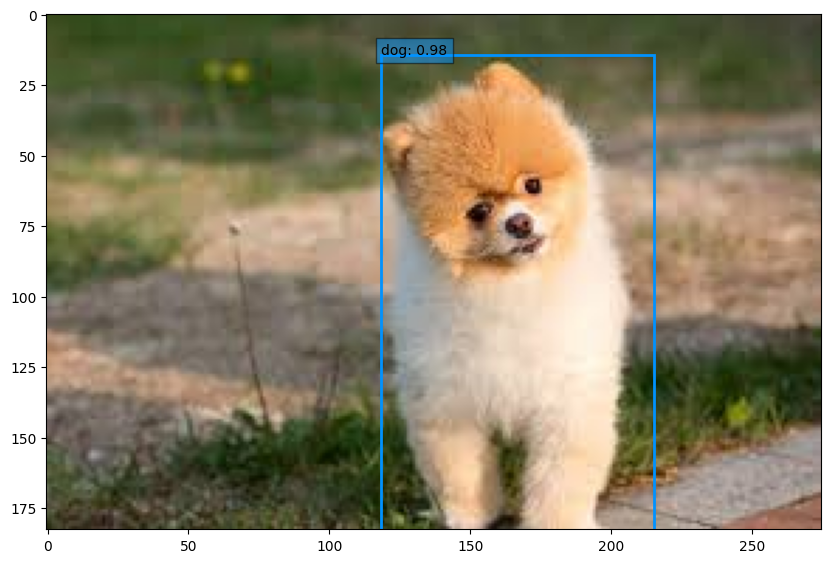

In [10]:
from ssd_predict_show import SSDPredictShow

image_file_path = "/home/seongwoo/workspace/DataScience_ML-DL/DL/lecture/detection_segmentation/SSD/voc_data/images.jpeg"

ssd = SSDPredictShow(eval_categories=voc_classes, net=model)
ssd.show(image_file_path, data_confidence_level=0.6)